<a href="https://colab.research.google.com/github/Sikandarh11/Machine-Learning-Projects/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from joblib import dump

**Importing Dataset**

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Preprocessing**

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [ ]:
dataset[dataset == 0].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: xlabel='Outcome', ylabel='count'>

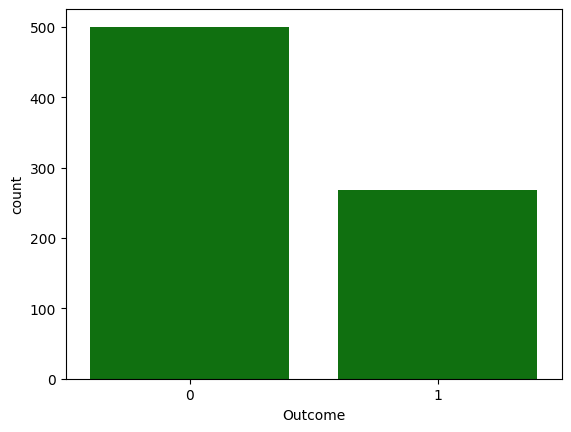

In [ ]:
sns.countplot(dataset, x='Outcome', color='green')

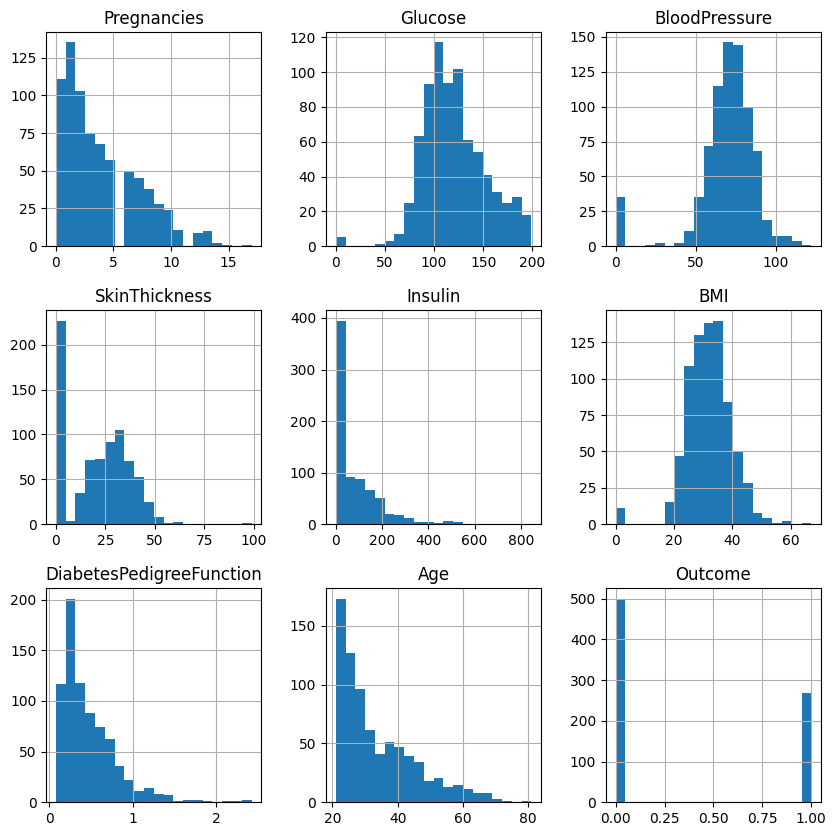

In [ ]:
dataset.hist(bins=20, figsize=(10,10))
plt.show()

 **Since most of the columns are right skewed so we apply QuantileTransformer() for normalizations**

In [ ]:
dataset['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X = dataset.drop(columns = 'Outcome', axis = 1)
Y = dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
'''
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)
x_scaled
scalar = RobustScaler()
x_scaled = scalar.fit_transform(X)
x_scaled'''

In [ ]:
scalar = RobustScaler()
x_scaled = scalar.fit_transform(X)
x_scaled

array([[ 0.6       ,  0.75151515,  0.        , ...,  0.17204301,
         0.66535948,  1.23529412],
       [-0.4       , -0.77575758, -0.33333333, ..., -0.58064516,
        -0.05620915,  0.11764706],
       [ 1.        ,  1.6       , -0.44444444, ..., -0.93548387,
         0.78300654,  0.17647059],
       ...,
       [ 0.4       ,  0.0969697 ,  0.        , ..., -0.62365591,
        -0.33333333,  0.05882353],
       [-0.4       ,  0.21818182, -0.66666667, ..., -0.20430108,
        -0.06143791,  1.05882353],
       [-0.4       , -0.58181818, -0.11111111, ..., -0.17204301,
        -0.1503268 , -0.35294118]])

In [ ]:
scalar = RobustScaler()
x_scaled = scalar.fit_transform(X)
x_scaled

array([[ 0.6       ,  0.75151515,  0.        , ...,  0.17204301,
         0.66535948,  1.23529412],
       [-0.4       , -0.77575758, -0.33333333, ..., -0.58064516,
        -0.05620915,  0.11764706],
       [ 1.        ,  1.6       , -0.44444444, ..., -0.93548387,
         0.78300654,  0.17647059],
       ...,
       [ 0.4       ,  0.0969697 ,  0.        , ..., -0.62365591,
        -0.33333333,  0.05882353],
       [-0.4       ,  0.21818182, -0.66666667, ..., -0.20430108,
        -0.06143791,  1.05882353],
       [-0.4       , -0.58181818, -0.11111111, ..., -0.17204301,
        -0.1503268 , -0.35294118]])

Data Standardizatiom

In [ ]:
scalar = QuantileTransformer()
x_scaled = scalar.fit_transform(X)
x_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


array([[0.74771838, 0.81029987, 0.51694915, ..., 0.59126467, 0.75097784,
        0.88983051],
       [0.2327249 , 0.09778357, 0.33637549, ..., 0.22750978, 0.47588005,
        0.55867014],
       [0.86375489, 0.95697523, 0.27900913, ..., 0.09191656, 0.78226858,
        0.58539765],
       ...,
       [0.6779661 , 0.54954368, 0.51694915, ..., 0.21316819, 0.25488918,
        0.52933507],
       [0.2327249 , 0.61994785, 0.18122555, ..., 0.40026076, 0.47392438,
        0.86701434],
       [0.2327249 , 0.17731421, 0.45110821, ..., 0.41329857, 0.42046936,
        0.20013038]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state=1)

In [ ]:
x_train.shape, y_train.shape, y_test.shape

((614, 8), (614,), (154,))

# **Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
accuracy_score(pred, y_test)

0.7727272727272727

**Creating model file**

In [ ]:
dump(model, open("Diabetes_prediction_model", "wb"))